Installing dependies

In [2]:
!pip install roboflow
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 98.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.3 MB/s eta 0:00:00


Loading dataset

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="jVqNb4xBSAP3tmffWgmT")
project = rf.workspace("joseph-nelson").project("mask-wearing")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Mask-Wearing-4 in yolov8:: 100%|██████████| 310/310 [00:00<00:00, 3660.29it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
print(f"location of where it is stored: {dataset.location}")
print(f"Name of the model: {dataset.model_format}")
print(f"Name of the dataset: {dataset.name}")
print(f"Version of the dataset: {dataset.version}")

location of where it is stored: /content/Mask-Wearing-4
Name of the model: yolov8
Name of the dataset: Mask Wearing
Version of the dataset: 4


Loading pre trained model

In [5]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

Traning of model

In [6]:
results = model.train(
    data="/content/Mask-Wearing-4/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    save=True,
    patience=20,
    project='mask-detection',
    optimizer='AdamW',
    lr0=0.001,
    augment=True
)

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Mask-Wearing-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=20, perspective=0.0, plots=True, 

Model accuracy

In [15]:
result = model.val()

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1552.4±562.4 MB/s, size: 88.0 KB)
val: Scanning /content/Mask-Wearing-4/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 29/29 62.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.9it/s 1.1s
                   all         29        162      0.867      0.756      0.844      0.533
                  mask         28        142      0.964      0.762      0.911      0.595
               no-mask          9         20      0.769       0.75      0.776      0.471
Speed: 5.2ms preprocess, 5.0ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/runs/detect/val7


Saving the model

In [16]:
model.save("face_detection_model.pt")

Loading the model

In [17]:
face_model = YOLO("face_detection_model.pt")

Making prediction


image 1/1 /content/test_image.png: 448x640 1 mask, 1 no-mask, 33.8ms
Speed: 5.2ms preprocess, 33.8ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)


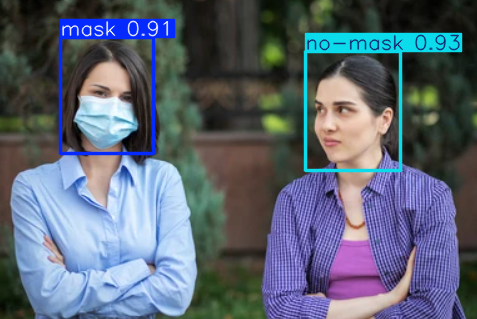

In [18]:
results = model.predict("test_image.png")
results[0].show()